<a id="Output"></a>

# Output

This notebook explores the output from model training.

In [90]:
import re
import pandas as pd

def get_learning_curves():
    pattern = r"(\d.\d+ \+\/\- \d.\d+)"

    output = {}


    for split in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        with open(f"/home/jdoe/repos/RLNER/models/std_logs/log_{split}.txt", "r") as fp:
            lines = fp.readlines()

        lines = " ".join(lines)
        progress = re.findall(pattern, lines)
        progress = [prog.split("+/-") for prog in progress]

        df = pd.DataFrame(progress, columns=["mean", "std"])
        df["mean"] = pd.to_numeric(df["mean"], errors='coerce')
        df["std"] = pd.to_numeric(df["std"], errors='coerce')

        output[split] = df
    
    return output

In [177]:
learning_curves = get_learning_curves()

In [201]:
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

mapping = {
    0: (0, 0),
    1: (0, 1),
    2: (1, 0),
    3: (1, 1),
    4: (2, 0),
    5: (2, 1),
    6: (3, 0),
    7: (3, 1),
    8: (4, 0),
    9: (4, 1),
}

def plot_learning_curves(learning_curves: Dict[str, pd.DataFrame], fill_between: bool = False, individually: bool = False) -> None:

    if individually:
        fig, axes = plt.subplots(
            len(learning_curves) // 2,
            2,
            figsize=(15, 25),
            sharex="all",
            sharey="all",
        )
        fig.subplots_adjust(hspace=0.4, top=0.85)
        fig.suptitle(f"REINFORCE Agent Learning Curves\n", size=30)

        for idx, curve in enumerate(learning_curves.keys()):
            x = range(len(learning_curves[curve]["mean"]))
            y = np.array(learning_curves[curve]["mean"])
            a, b = mapping[idx]
            axes[a][b].plot(x, y, label=f"Agent on {curve*100}% of Training Data")
            if fill_between:
                axes[a][b].fill_between(
                    range(len(learning_curves[curve]["mean"])), 
                    learning_curves[curve]["mean"] - learning_curves[curve]["std"],
                    learning_curves[curve]["mean"] + learning_curves[curve]["std"],
                    alpha=0.1
                )

            axes[a][b].set_title(f"REINFORCE Agent Learning Curve")
            axes[a][b].set_xlabel("Episodes")
            axes[a][b].set_ylabel("Average Rewards (F1 Score) During Training")
            axes[a][b].tick_params(labelbottom=True, labelleft=True)

            axes[a][b].legend(loc="lower right")

        
        plt.tight_layout()

        plt.show()

    else:
        _, ax = plt.subplots(figsize=(15, 10))

        for curve in learning_curves.keys():
            x = range(len(learning_curves[curve]["mean"]))
            y = learning_curves[curve]["mean"]
            ax.plot(x, y, label=f"Agent on {curve*100}% of Training Data")
            if fill_between:
                ax.fill_between(
                    range(len(learning_curves[curve]["mean"])), 
                    learning_curves[curve]["mean"] - learning_curves[curve]["std"],
                    learning_curves[curve]["mean"] + learning_curves[curve]["std"],
                    alpha=0.1
                )

        ax.set_title(f"REINFORCE Agent Learning Curves", size=30)
        ax.set_xlabel("Episodes", size=20)
        ax.set_ylabel("Average Rewards (F1 Score) During Training", size=20)

        plt.legend(loc="lower right")

        plt.show()

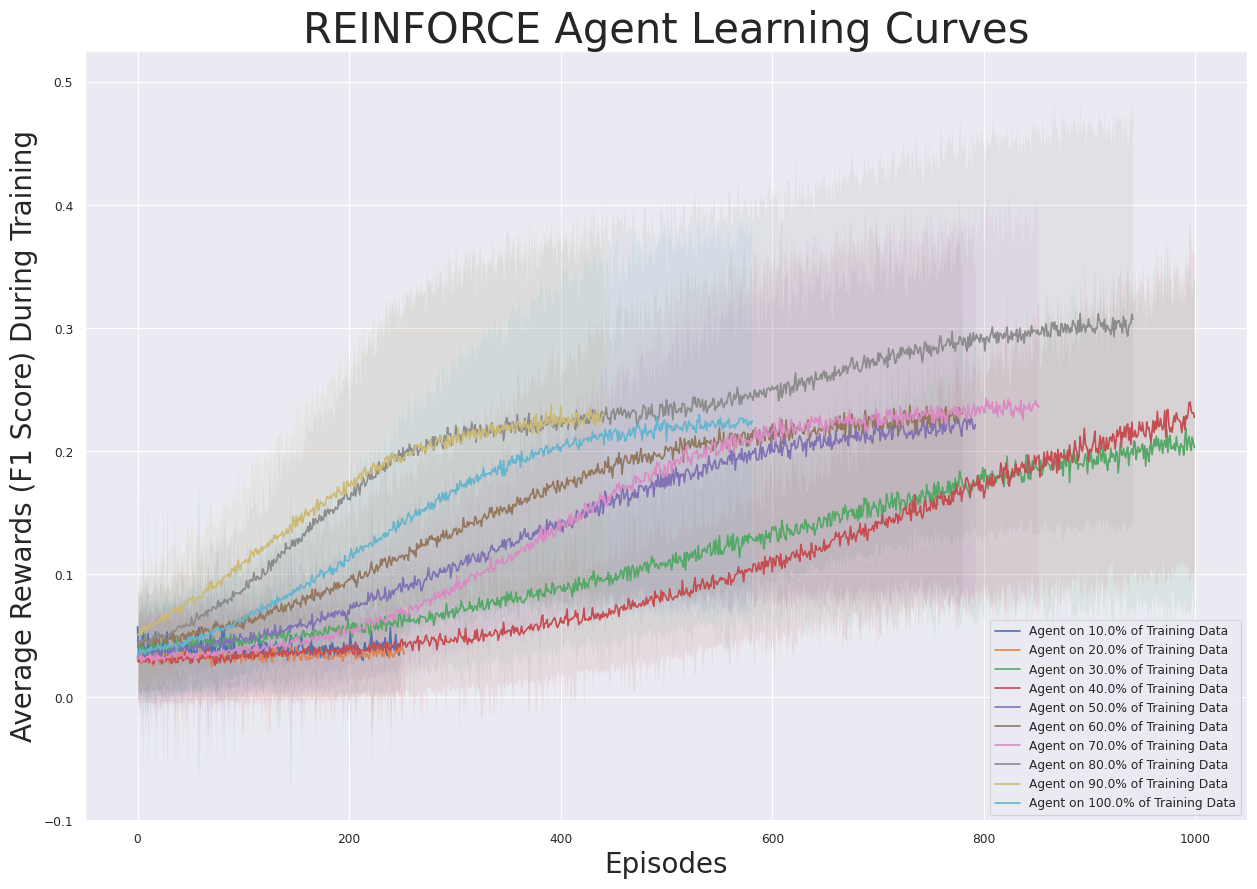

In [204]:
plot_learning_curves(get_learning_curves(), individually=False, fill_between=True)